<a href="https://colab.research.google.com/github/selfor21/PJI410/blob/main/HR_Attrition_pt_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO INTEGRADOR IV - UNIVESP - 2023 - CIÊNCIA DE DADOS**

## Na versão 02, iremos diminuir a quantidade de atributos através dos seguintes critérios:
- Importância no modelo menor que 1%.
- Correlação de 0,95 entre os atributos.


# 1- **Bibliotecas**

In [16]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 2- **Carregamento do arquivo e inspeção**

In [17]:
df = pd.read_csv('HR.csv')
df.head(2).T

,0,1
Age,41,49
Attrition,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,1102,279
Department,Sales,Research & Development
DistanceFromHome,1,8
Education,2,1
EducationField,Life Sciences,Life Sciences
EmployeeCount,1,1
EmployeeNumber,1,2


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 3- **Pré-processamento**

### Através do Modelo de Machine Learning - Random Forest utilizado na solução inicial, pudemos perceber que muitas colunas/atributos tem influência mínima na acurácia do modelo. Por este motivo, e para manter o modelo simples, estamos eliminando estas colunas.

In [19]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EducationField', 'PercentSalaryHike', 'TrainingTimesLastYear', 
              'YearsSinceLastPromotion', 'PerformanceRating', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education', 
              'Gender', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'EmployeeNumber', 'RelationshipSatisfaction'], axis = 1)
df.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,1102,1,94,2,Sales Executive,Single,5993,19479,8,Yes,0,8,6,4,5
1,49,No,279,8,61,2,Research Scientist,Married,5130,24907,1,No,1,10,10,7,7


In [13]:
df.tail(2)

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1468,49,No,1023,2,63,2,Sales Executive,Married,5390,13243,2,No,0,17,9,6,8
1469,34,No,628,8,82,2,Laboratory Technician,Married,4404,10228,2,No,0,6,4,3,2


In [14]:
df.shape

(1470, 17)

# 4- **Visualização dos Dados**

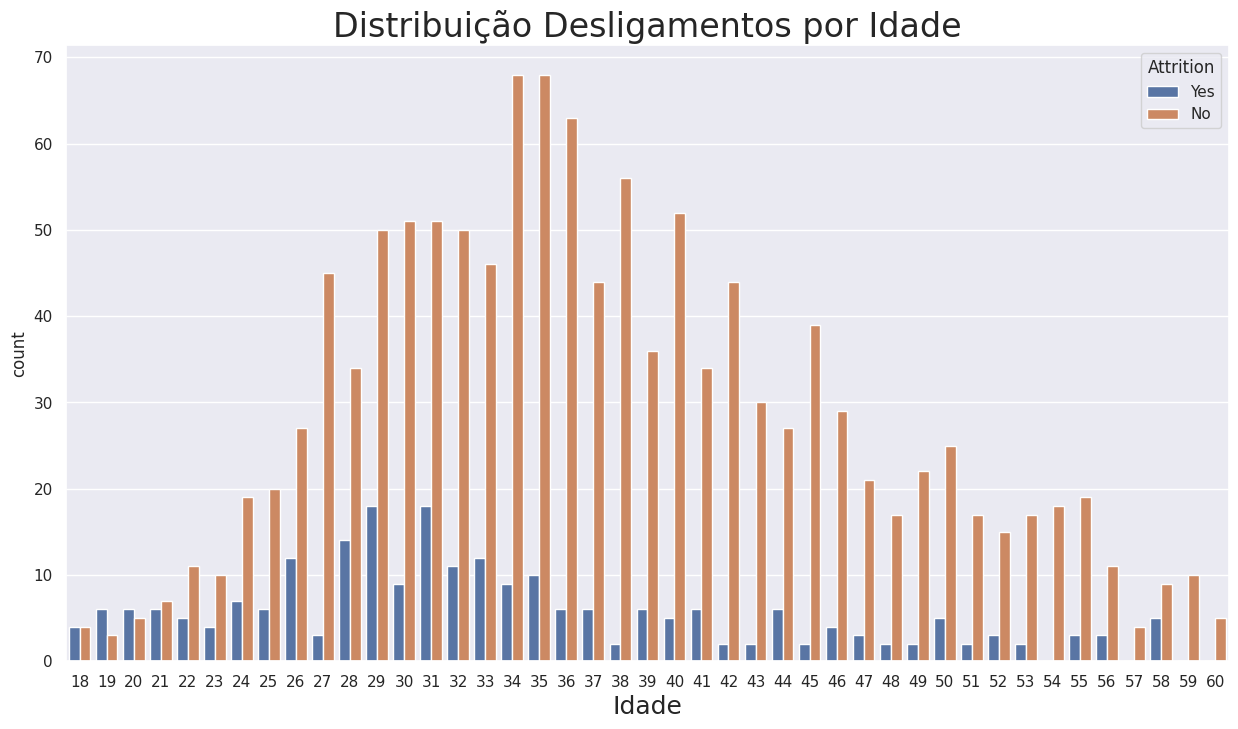

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Age', hue="Attrition", data=df)
plt.title('Distribuição Desligamentos por Idade', fontsize=24)
plt.xlabel('Idade', fontsize=18)
plt.show()

Empregados com idade abaixo de 22 anos são mais prováveis de sair, seguidos pelo grupo entre 22 e 29 anos. Após 30, a taxa de desligamentos decai.

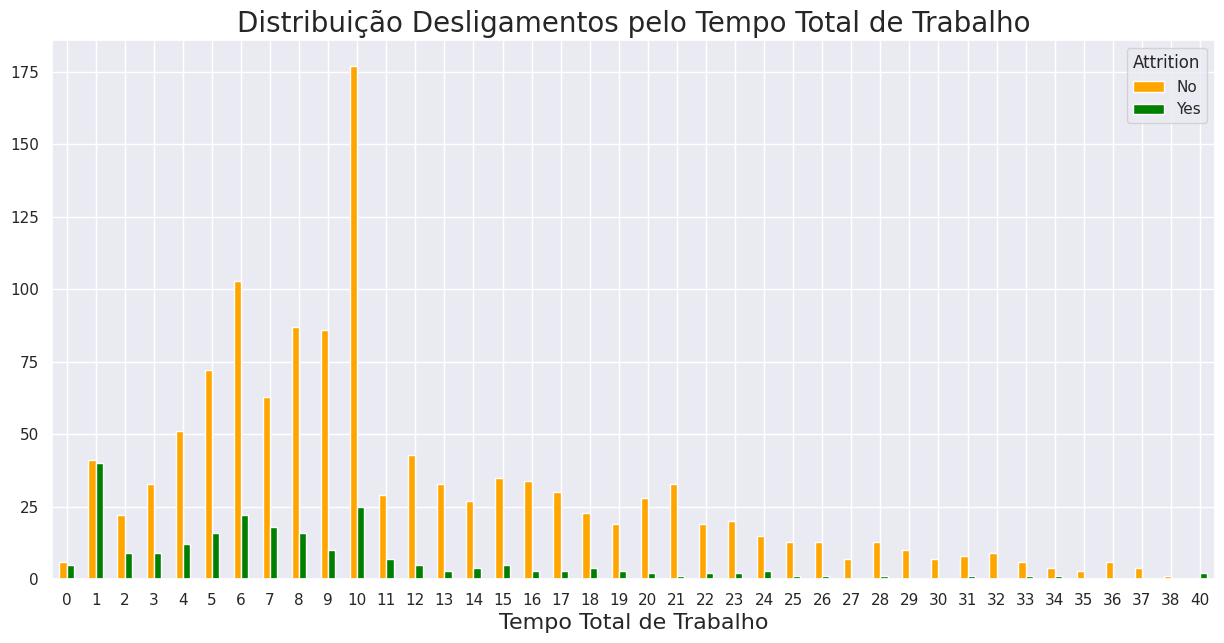

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
working_years_group = df.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='number')
working_years_group = working_years_group.pivot(columns='Attrition', index='TotalWorkingYears', values = 'number')
working_years_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição Desligamentos pelo Tempo Total de Trabalho', fontsize=20)
plt.xlabel('Tempo Total de Trabalho', fontsize=16)
plt.show() 

Funcinonários que trabalham há menos de 2 anos, tem altas taxas de desligamento (quase 50%), seguidos pelos que trabalham entre 2 e 7 anos.

Funcionários solteiros tem maior probabilidade de se desligar.

# 5- **Preparando o conjunto de dados - Transformando variáveis categóricas**

In [23]:
df_2 = df.copy()
df_2['Attrition'] = df_2['Attrition'].apply(lambda x: 0 if x=='No' else 1)
df_2['OverTime'] = df_2['OverTime'].apply(lambda x: 0 if x=='No' else 1)

MaritalStatus_map = {'Single':0, 'Divorced':1, 'Married':2}
df_2['MaritalStatus'] = df_2['MaritalStatus'].map(MaritalStatus_map)

JobRole_map = {'Sales Executive':0,'Sales Representative':1,'Laboratory Technician':2,'Manufacturing Director':3,
              'Healthcare Representative':4,'Manager':5,'Research Scientist':6,'Research Director':7,'Human Resources':8}
df_2['JobRole'] = df_2['JobRole'].map(JobRole_map)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1470 non-null   int64
 1   Attrition             1470 non-null   int64
 2   DailyRate             1470 non-null   int64
 3   DistanceFromHome      1470 non-null   int64
 4   HourlyRate            1470 non-null   int64
 5   JobLevel              1470 non-null   int64
 6   JobRole               1470 non-null   int64
 7   MaritalStatus         1470 non-null   int64
 8   MonthlyIncome         1470 non-null   int64
 9   MonthlyRate           1470 non-null   int64
 10  NumCompaniesWorked    1470 non-null   int64
 11  OverTime              1470 non-null   int64
 12  StockOptionLevel      1470 non-null   int64
 13  TotalWorkingYears     1470 non-null   int64
 14  YearsAtCompany        1470 non-null   int64
 15  YearsInCurrentRole    1470 non-null   int64
 16  YearsW

### Salvar uma cópia do arquivo de dados tratado.

In [26]:
df_2.to_csv('HR_02.csv')

### Mapa de Calor correlacionando os atributos

Text(0.5, 1.0, 'Correlation Graph')

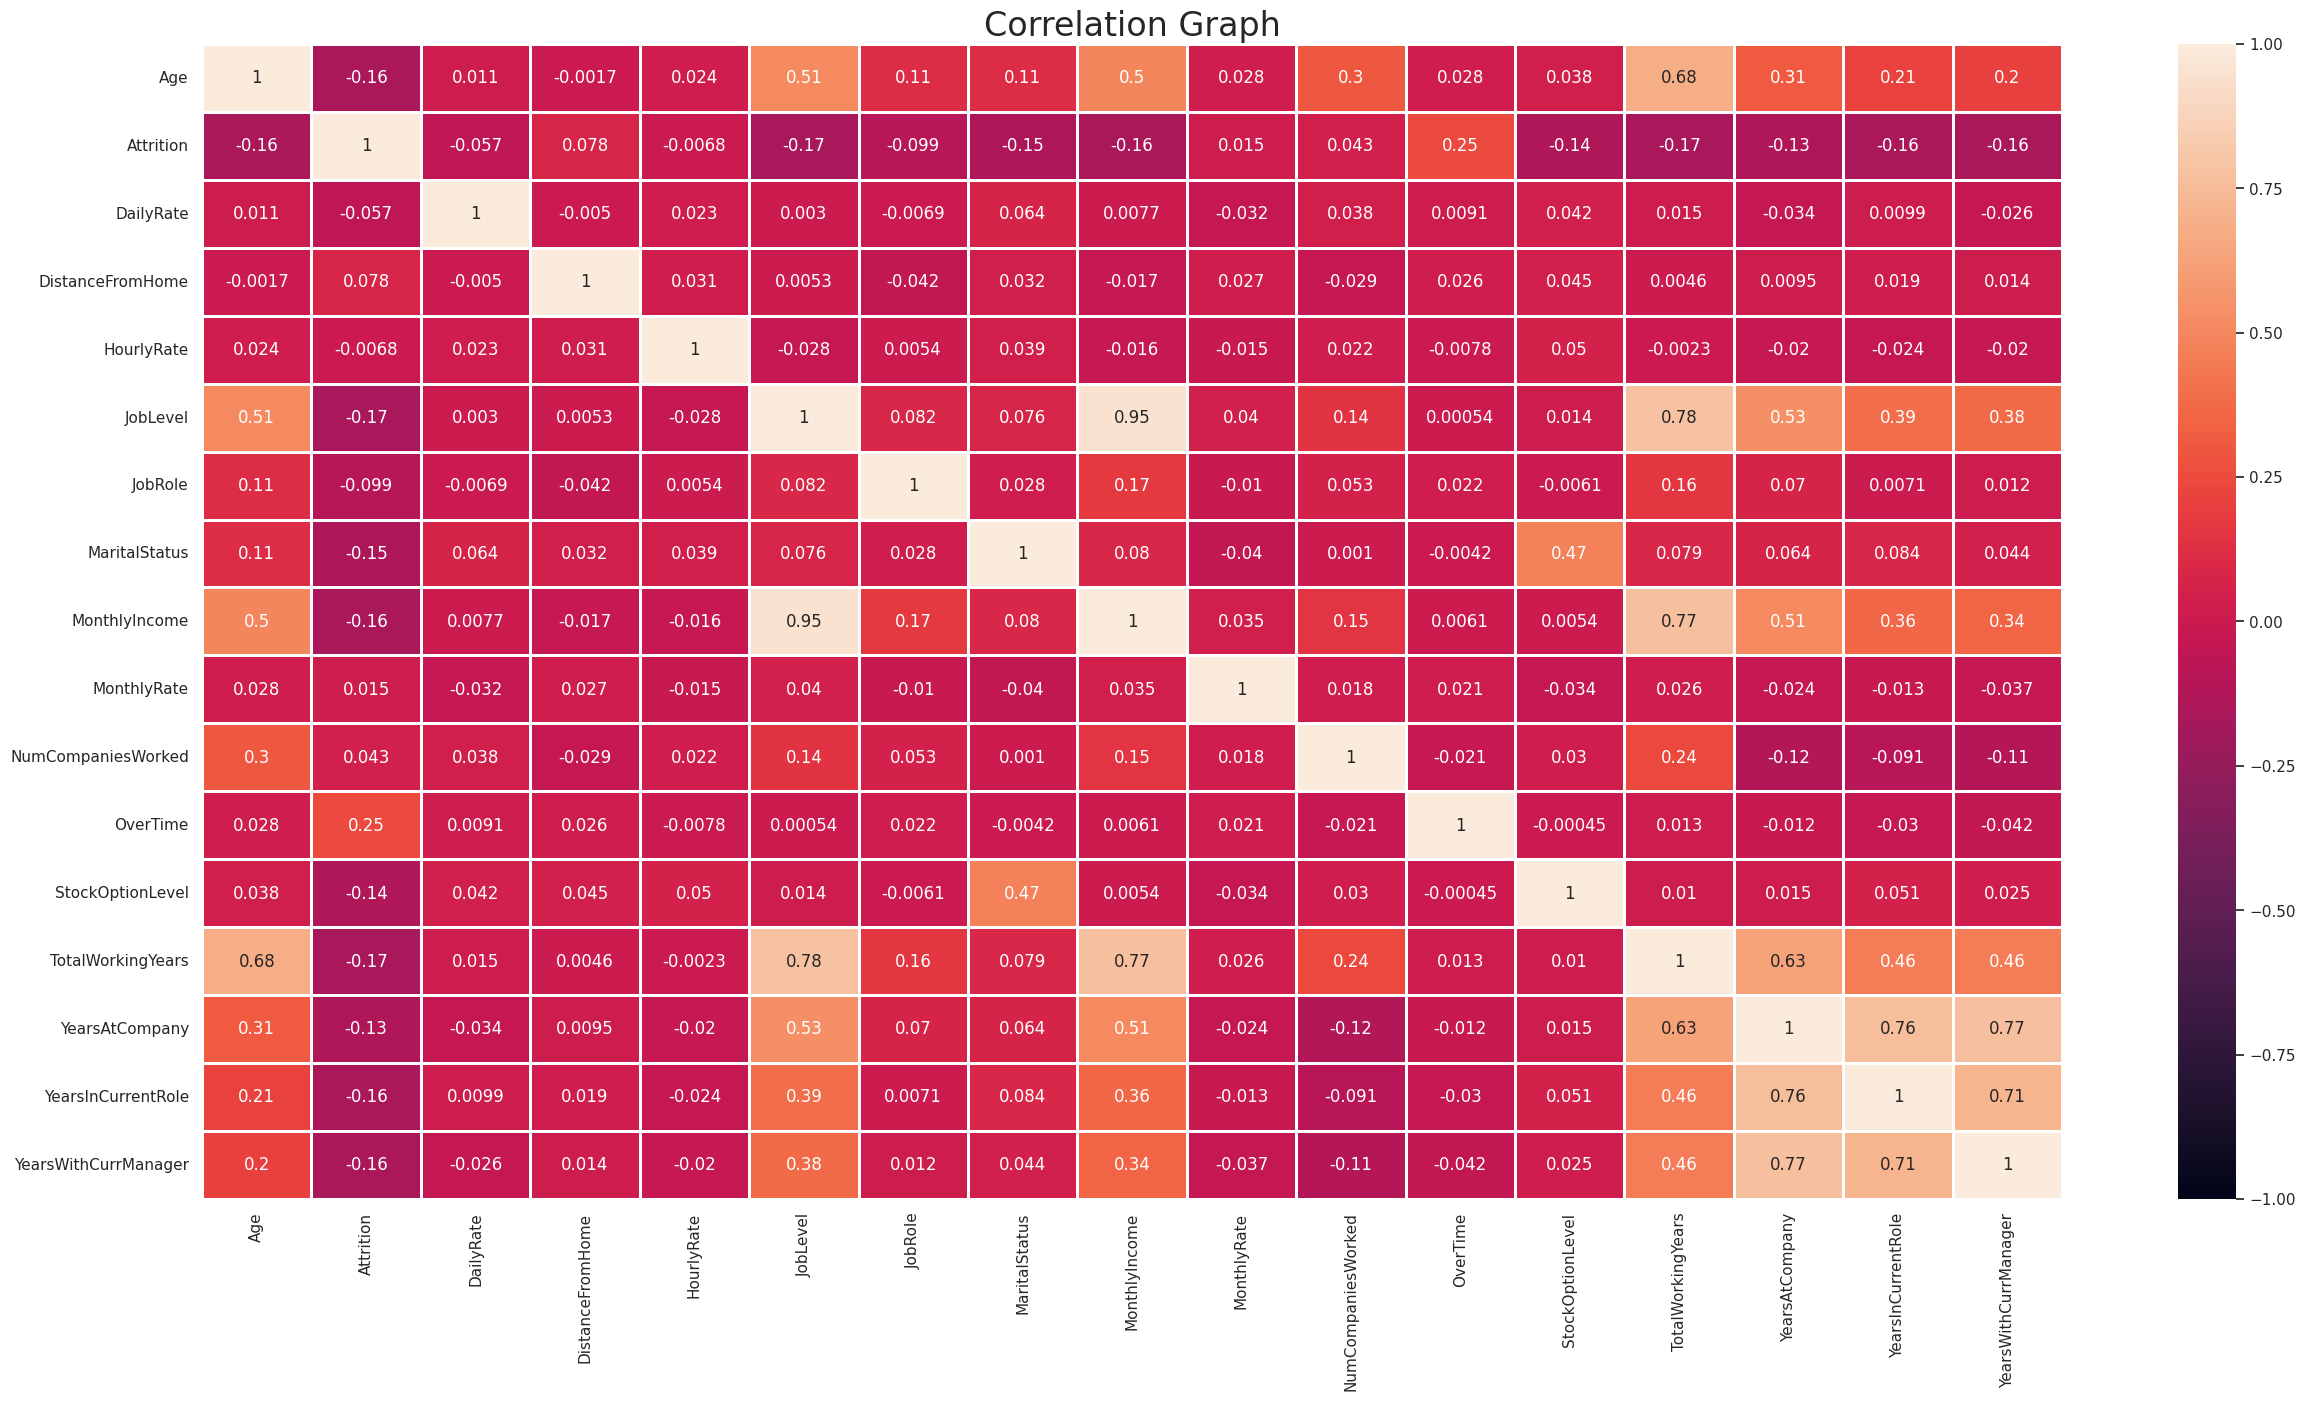

In [ ]:
plt.figure(figsize=(30,15))
correlation = sns.heatmap(df_2.corr(), vmin=-1, vmax=1, annot=True, linewidths=1)
correlation.set_title('Correlation Graph', fontdict={'fontsize': 24})

Observando os indices de correlação altos, poderemos mais adiante, simplificar o modelo reduzindo alguns atributos que apresentem redundância. Por exemplo, Monthly Income e JobLevel apresentam correlação de 0,95.

# 6- **Modelos de Machine Learning**

## **Algoritmo 'Random Forest Classifier' para Predição**

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8684807256235828


In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
629,0,0
1229,0,0
731,1,1
1223,1,0
651,0,0
...,...,...
634,0,0
307,0,0
552,0,0
897,0,0


### **Listando as características de acordo com sua importância no score do modelo**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

TotalWorkingYears       0.189794
OverTime                0.168486
MonthlyIncome           0.095362
Age                     0.089669
YearsAtCompany          0.076634
JobLevel                0.056142
StockOptionLevel        0.055881
YearsWithCurrManager    0.054595
JobRole                 0.051033
MaritalStatus           0.042267
YearsInCurrentRole      0.023303
NumCompaniesWorked      0.023169
DailyRate               0.021175
HourlyRate              0.018854
DistanceFromHome        0.017692
MonthlyRate             0.015943
dtype: float64

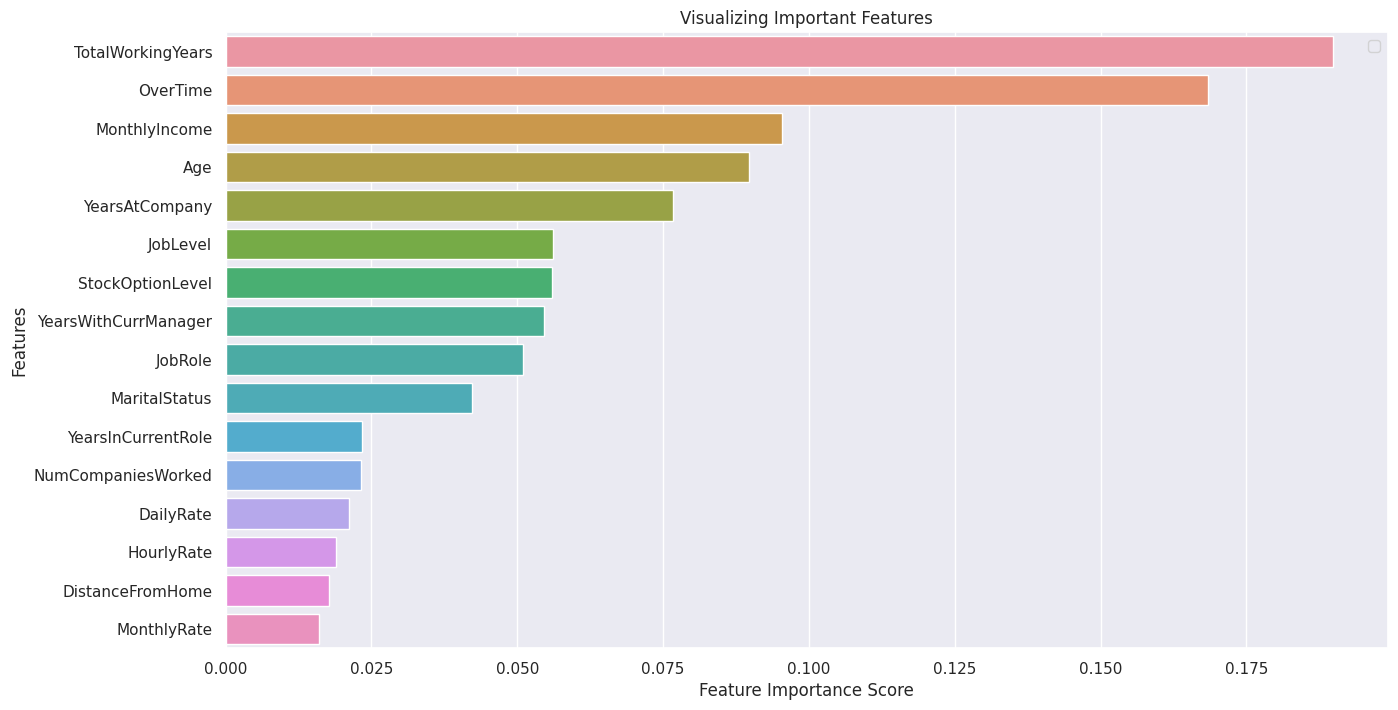

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={"figure.figsize": (20,15)})
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## **Predição com 'Logistic Regression'**

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
result_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_2

,Actual,Predicted
442,0,0
1091,0,0
981,1,0
785,0,0
1332,1,0
...,...,...
817,0,0
399,0,0
458,0,0
406,0,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8458049886621315
Precision: 0.6666666666666666
Recall: 0.05714285714285714
